In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
file = 'dates.csv'
df = pd.read_csv(file)
date_col = "Dates"
price_col = "USD"
df.dropna(inplace=True)
print(df)
df.describe()
df[price_col] = df[price_col].astype(float)


         Dates  USD  Users  Numbers
1   12-06-2002   18   User        1
2   13/06/2002   19   User        1
3   14.06.2002   20  Admin        2
4   15.06.2002   21   User        1
5   16.06.2002   23   User        1
6   17.06.2002   21   User        1
7    18.6.2002   20   User        1
8   19.06.2002   20   User        1
9   20.06.2002   21   User        1
10  21.06.2002   18   User        1
11  22.06.2002   21   User        1
12  23.06.2002   23   User        1
13  24.06.2002   23   User        1
14  25.06.2002   22   User        1
15  26.06.2002   23   User        1


In [12]:
df[date_col] = pd.to_datetime(df['Dates'], format='mixed',dayfirst=True)
print(df)
print('Type Dates:\n', df[date_col].dtypes)
print('Type Prices:\n', df[price_col].dtypes)

        Dates   USD  Users  Numbers
1  2002-06-12  18.0   User        1
2  2002-06-13  19.0   User        1
3  2002-06-14  20.0  Admin        2
4  2002-06-15  21.0   User        1
5  2002-06-16  23.0   User        1
6  2002-06-17  21.0   User        1
7  2002-06-18  20.0   User        1
8  2002-06-19  20.0   User        1
9  2002-06-20  21.0   User        1
10 2002-06-21  18.0   User        1
11 2002-06-22  21.0   User        1
12 2002-06-23  23.0   User        1
13 2002-06-24  23.0   User        1
14 2002-06-25  22.0   User        1
15 2002-06-26  23.0   User        1
Type Dates:
 datetime64[us]
Type Prices:
 float64


        Dates   USD  Users  Numbers
1  2002-06-12  18.0   User        1
2  2002-06-13  19.0   User        1
3  2002-06-14  20.0  Admin        2
4  2002-06-15  21.0   User        1
5  2002-06-16  23.0   User        1
6  2002-06-17  21.0   User        1
7  2002-06-18  20.0   User        1
8  2002-06-19  20.0   User        1
9  2002-06-20  21.0   User        1
10 2002-06-21  18.0   User        1
11 2002-06-22  21.0   User        1
12 2002-06-23  23.0   User        1
13 2002-06-24  23.0   User        1
14 2002-06-25  22.0   User        1
15 2002-06-26  23.0   User        1


<Axes: xlabel='Dates', ylabel='USD'>

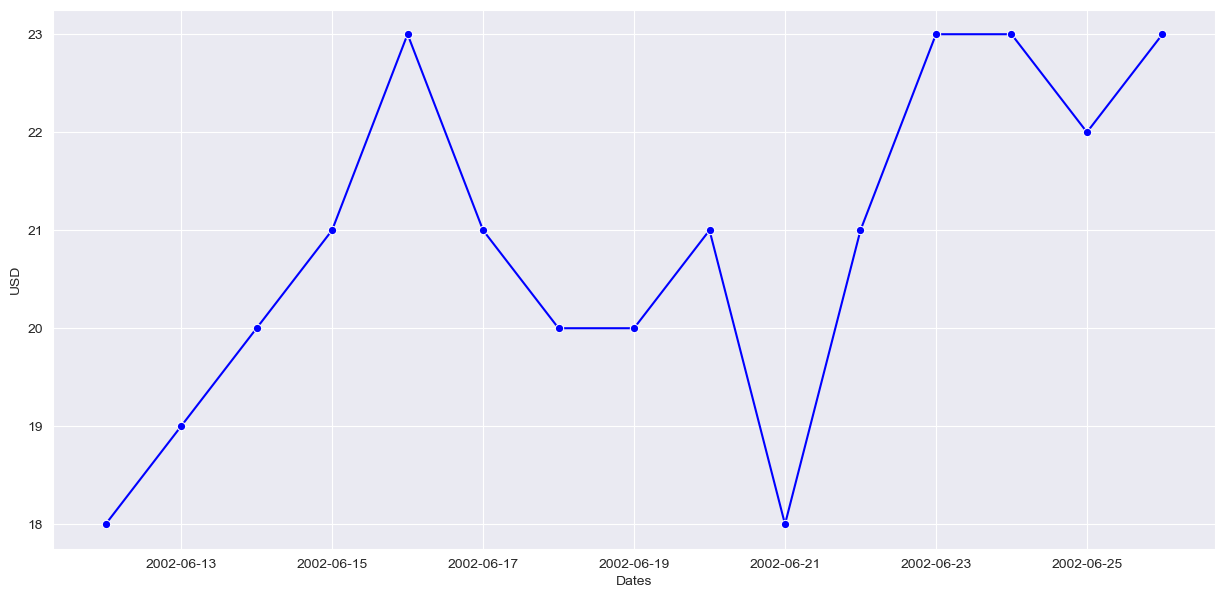

In [13]:
df = df.sort_values(date_col)
print(df)

plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='Dates', y='USD', marker='o', color='b')


Еще больше метрики и анализа!!!!)


<Axes: xlabel='Dates', ylabel='USD'>

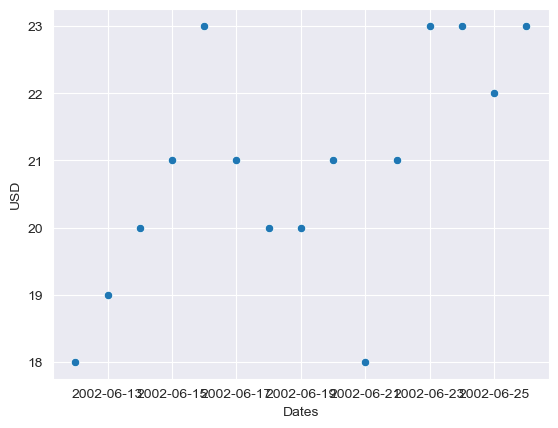

In [14]:
sns.scatterplot(x=date_col, y=price_col, data=df)
#  проверим на линейность

       Dates        USD
0 2002-06-16  20.200000
1 2002-06-23  20.571429
2 2002-06-30  22.666667


<Axes: xlabel='Dates', ylabel='USD'>

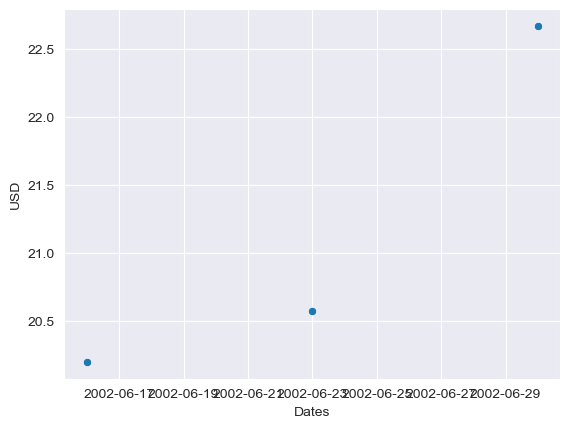

In [18]:
df_weekly = df.groupby(pd.Grouper(key=date_col, freq='W')).agg({'USD': 'mean'}).reset_index()
print(df_weekly)
sns.scatterplot(x=date_col, y=price_col, data=df_weekly)
# группировка по неделям и метрика

№1.  Параметр freq:
    •   'W' — неделя (по воскресеньям).
    •   'M' — если захотите по месяцам.
    •   'MS' — начало месяца.
    •   'D' — по дням.
2.  Агрегация (.agg):
    •   Если вам нужна не сумма, а среднее, напишите: .agg({'USD': 'mean'}).
    •   Если нужно и сумму, и количество пользователей: .agg({'USD': 'sum', 'Users': 'count'}).
3.  Маркеры: В sns.lineplot я добавил marker='s' (square — квадрат), чтобы вы четко видели на линии каждую конкретную неделю.
4.  Пустые недели: Если в ваших данных между датами есть пропуски в несколько недель, pd.Grouper может их пропустить. Если вы хотите, чтобы пустые недели тоже отображались (со значением 0), лучше использовать df.set_index('Dates').resample('W').sum().fillna(0).reset_index().

Я добавил в dates колонку с Region)) В зависимости от региона определите платежеспособность модели, я сделаю этот тут чуть позже.